In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
R_S = 0.6 

C_S =  2.936041
C_T = -0.4933897

C_1 = -0.1013462
C_2 = -0.1444844
C_3 = -0.03647634
C_4 = -0.01630825
C_5 = -0.006658100
C_6 = -0.06176835
C_7 = -0.9578191

D_1  = -0.03102824
D_2  = -0.004438695
D_3  = -0.01351171
D_4  = -0.0007084459
D_5  =  0.01110108
D_6  = -0.008598857
D_7  = -0.05367908
D_8  =  0.03119241
D_9  =  0.03281636
D_10 = -0.08647128
D_11 = -0.01167788

C_0_IV = 0.009575695
C_0_IT = 0.02194758

C_1_IT = -0.001550501
C_2_IT = -0.008354679
C_3_IT = -0.006682746
C_4_IT =  0.01276971

H_BAR = 197.3269804

In [78]:
def c_rs(r):
    return H_BAR*np.exp(-(r/R_S)**2)/(np.sqrt(np.pi)*R_S)**3

def d1_c_rs(r):
    return -2*H_BAR*np.exp(-(r/R_S)**2)*r/(np.sqrt(np.pi)**3*R_S**5)

def d2_c_rs(r):
    return -2*H_BAR*np.exp(-(r/R_S)**2)/(np.sqrt(np.pi)**3*R_S**7)*(-2*r**2 + R_S**2)

def d3_c_rs(r):
    return 4*H_BAR*np.exp(-(r/R_S)**2)*r/(np.sqrt(np.pi)**3*R_S**9)*(-2*r**2 + 3*R_S**2)

def d4_c_rs(r):
    return 4*H_BAR*np.exp(-(r/R_S)**2)/(np.sqrt(np.pi)**3*R_S**11)*(4*r**4 - 12*(r*R_S)**2 + 3*R_S**4)

In [79]:
def v_c(r):
    return C_S*c_rs(r) + C_1*(-d2_c_rs(r) - 2*d1_c_rs(r)/r) + D_1*(d4_c_rs(r) + 4*d3_c_rs(r)/r)

def v_tau(r):
    return C_2*(-d2_c_rs(r) - 2*d1_c_rs(r)/r) + D_2*(d4_c_rs(r) + 4*d3_c_rs(r)/r)

def v_sigma(r):
    return C_T*c_rs(r) + C_3*(-d2_c_rs(r) - 2*d1_c_rs(r)/r) + D_3*(d4_c_rs(r) + 4*d3_c_rs(r)/r)

def v_sigma_tau(r):
    return C_4*(-d2_c_rs(r) - 2*d1_c_rs(r)/r) + D_4*(d4_c_rs(r) + 4*d3_c_rs(r)/r)

def v_t(r):
    return -C_5*(d2_c_rs(r) - d1_c_rs(r)/r) + D_5*(d4_c_rs(r) + d3_c_rs(r)/r - 6*d2_c_rs(r)/r**2 + 6*d1_c_rs(r)/r**3)

def v_t_tau(r):
    return -C_6*(d2_c_rs(r) - d1_c_rs(r)/r) + D_6*(d4_c_rs(r) + d3_c_rs(r)/r - 6*d2_c_rs(r)/r**2 + 6*d1_c_rs(r)/r**3)

def v_b(r):
    return -C_7*d1_c_rs(r)/r + D_7*(d3_c_rs(r)/r + 2*d2_c_rs(r)/r**2 - 2*d1_c_rs(r)/r**3)

def v_b_tau(r):
    return D_8*(d3_c_rs(r)/r + 2*d2_c_rs(r)/r**2 - 2*d1_c_rs(r)/r**3)

def v_b_b(r):
    return -D_9*(d2_c_rs(r)/r**2 - d1_c_rs(r)/r**3)

def v_q(r):
    return -D_10*(d2_c_rs(r)/r**2 - d1_c_rs(r)/r**3)

def v_q_sigma(r):
    return -D_11*(d2_c_rs(r)/r**2 - d1_c_rs(r)/r**3)

def v_T(r):
    return C_0_IT*c_rs(r) + C_1_IT*(-d2_c_rs(r) - 2*d1_c_rs(r)/r)

def v_tau_z(r):
    return C_0_IV*c_rs(r)

def v_sigma_T(r):
    return C_2_IT*(-d2_c_rs(r) - 2*d1_c_rs(r)/r)

def v_t_T(r):
    return -C_3_IT*(d2_c_rs(r) - d1_c_rs(r)/r)

def v_b_T(r):
    return -C_4_IT*d1_c_rs(r)/r


In [80]:
# test C constants
lecs = np.loadtxt('../short_lecs.dat', unpack=True)
print(lecs[0]-C_S)
print(lecs[1]-C_T)
print(lecs[2]-C_1)
print(lecs[3]-C_2)
print(lecs[4]-C_3)
print(lecs[5]-C_4)
print(lecs[6]-C_5)
print(lecs[7]-C_6)
print(lecs[8]-C_7)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


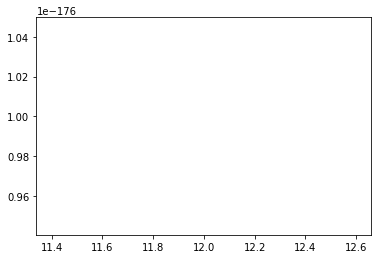

In [81]:
# test CRs
CRs = np.loadtxt('../CRs_test.dat', unpack=True)
r = CRs[0]
plt.plot(r, CRs[1]-c_rs(r))
plt.show()

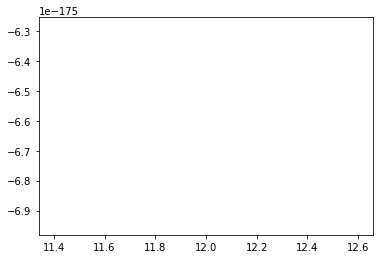

In [82]:
# test d1cRs
d1cRs = np.loadtxt('../d1cRs_test.dat', unpack=True)
r = d1cRs[0]
plt.plot(r, d1cRs[1]-d1_c_rs(r))
plt.show()

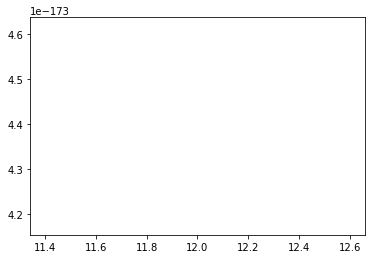

In [83]:
# test d2cRs
d2cRs = np.loadtxt('../d2cRs_test.dat', unpack=True)
r = d2cRs[0]
plt.plot(r, d2cRs[1]-d2_c_rs(r))
plt.show()

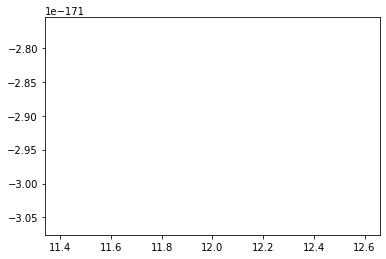

In [84]:
# test d3cRs
d3cRs = np.loadtxt('../d3cRs_test.dat', unpack=True)
r = d3cRs[0]
plt.plot(r, d3cRs[1]-d3_c_rs(r))
plt.show()

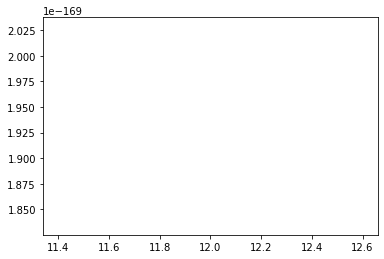

In [85]:
# test d4cRs
d4cRs = np.loadtxt('../d4cRs_test.dat', unpack=True)
r = d4cRs[0]
plt.plot(r, d4cRs[1]-d4_c_rs(r))
plt.show()

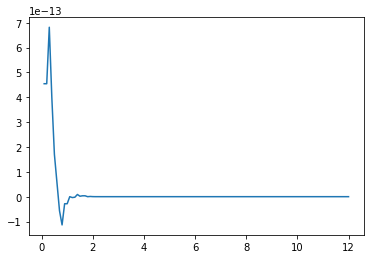

In [86]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[1]-v_c(r))
plt.show()

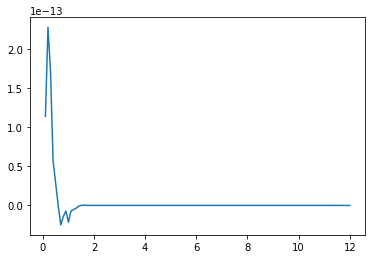

In [102]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[2]-v_tau(r))
plt.show()

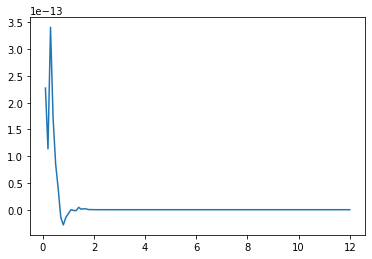

In [104]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[3]-v_sigma(r))
plt.show()

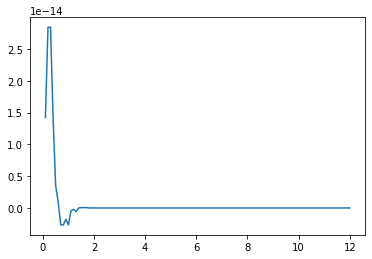

In [105]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[4]-v_sigma_tau(r))
plt.show()

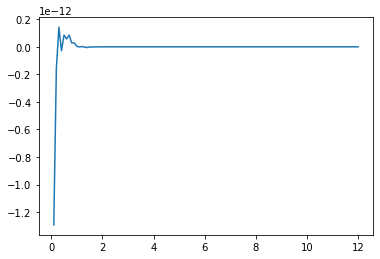

In [106]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[5]-v_t(r))
plt.show()

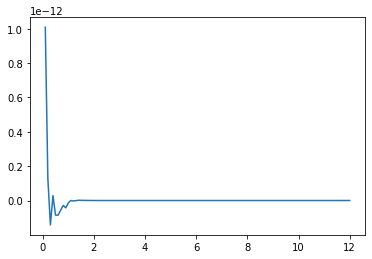

In [107]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[6]-v_t_tau(r))
plt.show()

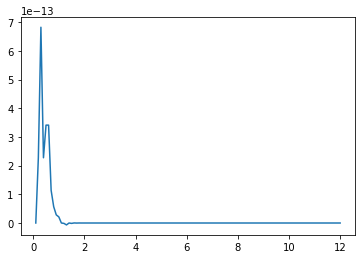

In [108]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[7]-v_b(r))
plt.show()

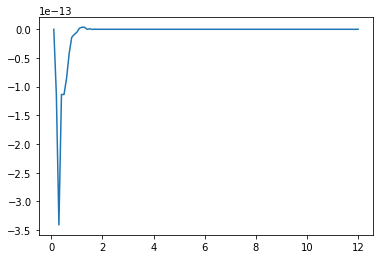

In [109]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[8]-v_b_tau(r))
plt.show()

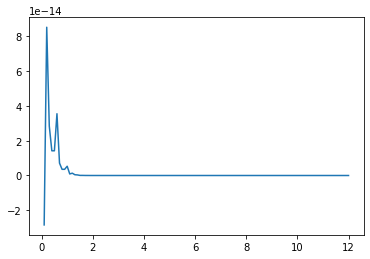

In [110]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[9]-v_b_b(r))
plt.show()

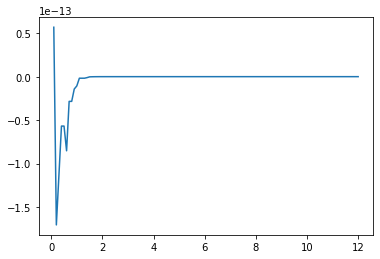

In [113]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[10]-v_q(r))
plt.show()

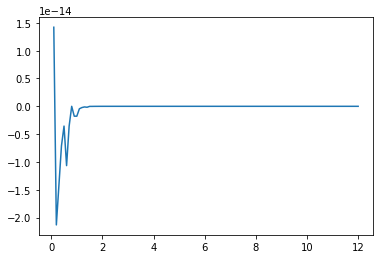

In [114]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[11]-v_q_sigma(r))
plt.show()

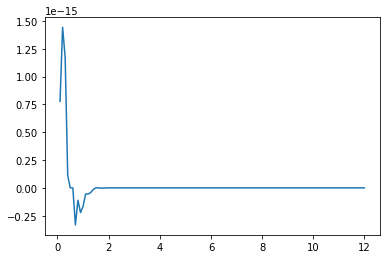

In [115]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[12]-v_T(r))
plt.show()

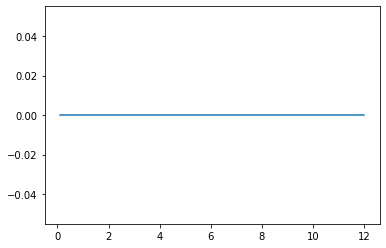

In [117]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[13]-v_tau_z(r))
plt.show()

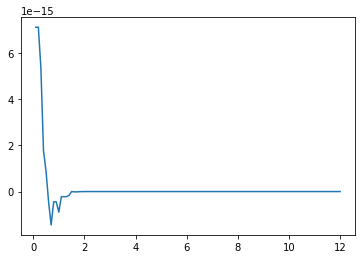

In [118]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[14]-v_sigma_T(r))
plt.show()

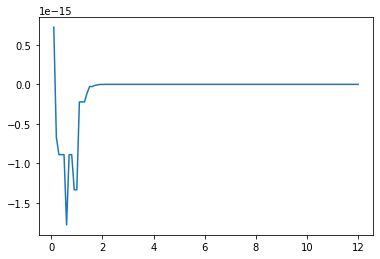

In [119]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[15]-v_t_T(r))
plt.show()

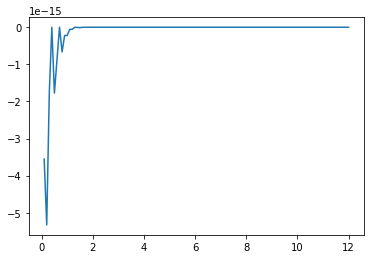

In [120]:
short_range_chiral = np.loadtxt('../short_range_chiral.dat', unpack=True)
r = short_range_chiral[0]
plt.plot(r, short_range_chiral[16]-v_b_T(r))
plt.show()